## Experiments

In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
series_reporters = [
    "recovered-hospital",
    "recovered-with-help",
    "recovered-unchecked",
    "fraction-called-in",
    "deaths",
    "number-destroyed-streets-spotted",
    "fraction-destroyed-streets-spotted",
]

single_reporters = [
    'count crossings with [building-status = "collapsed"]',
    'count crossings with [building-status = "high-damage"]',
    "number-destroyed-streets",
]

In [3]:
replications = 25
exp_nr = 6
exp_names = ["no-drones", "short-range", "slow-reroute", "more-drones", "large-view", "fast-reroute", "many-long-range"]
exp_names = [f"{i}_{name}" for i, name in enumerate(exp_names)]
print(exp_names)

['0_no-drones', '1_short-range', '2_slow-reroute', '3_more-drones', '4_large-view', '5_fast-reroute', '6_many-long-range']


In [4]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for name in exp_names:
    dfs[name] = pd.read_pickle(f"../results/experiments/exp_series_{name}_{replications}r_df.pickle")

In [5]:
KPIs = series_reporters[:3] + series_reporters[4:5]

df720 = {}
for KPI in KPIs:
    df720[KPI] = pd.DataFrame()
    for name, df in dfs.items():
        df720[KPI][name] = df.iloc[720][KPI]
df720["recovered-hospital"].head(3)

,0_no-drones,1_short-range,2_slow-reroute,3_more-drones,4_large-view,5_fast-reroute,6_many-long-range
0,441.0,599.0,546.0,580.0,542.0,627.0,594.0
1,540.0,518.0,567.0,427.0,636.0,658.0,591.0
2,389.0,430.0,617.0,512.0,596.0,696.0,554.0


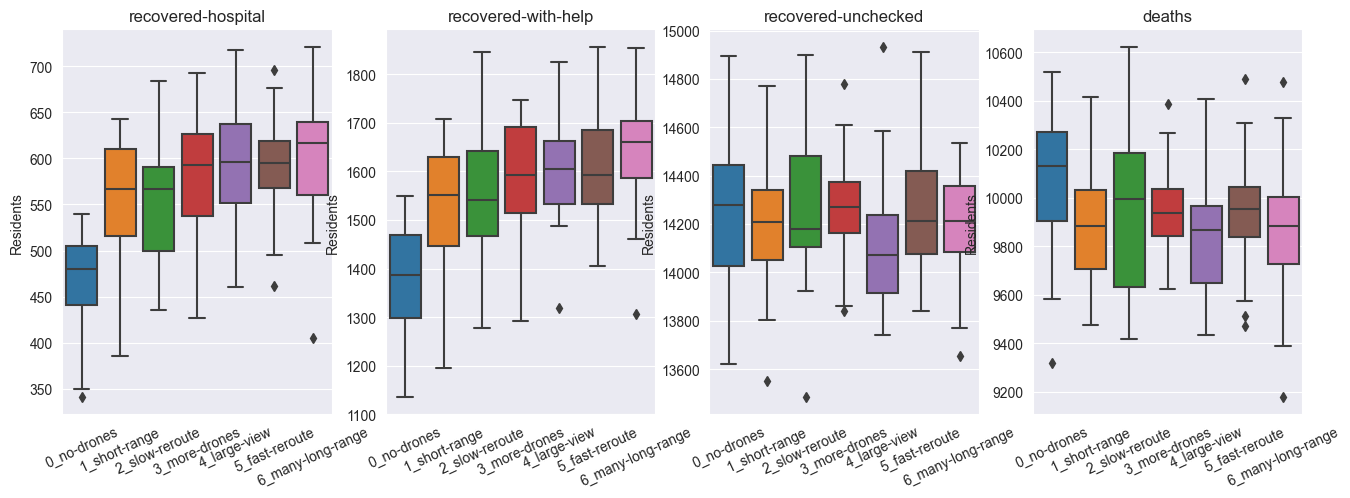

In [6]:
fig, axes = plt.subplots(1,len(KPIs))
fig.set_size_inches(16,5)
g = {}
for i, KPI in enumerate(KPIs):
    g[KPI] = sns.boxplot(df720[KPI], ax=axes[i])
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=25)
    g[KPI].set_title(KPI)
    g[KPI].set_ylabel("Residents")
fig.savefig("../images/recovered_boxplots.svg")

### Dynamics

In [7]:
# Create an empty DataFrame for each KPI
dy_dict = {}
for KPI in KPIs:
    dy_dict[KPI] = pd.DataFrame()

# For each experiment, add a data column to the dataframe of each KPI
for i, exp in enumerate(exp_names):
    df_t = dfs[exp].sort_index(axis="columns", level=0)
    for KPI in KPIs:
        dy_dict[KPI][exp] = df_t[KPI].unstack()
dy_dict[KPIs[0]].head()

0_no-drones 1_short-range 2_slow-reroute 3_more-drones 4_large-view  \
0 0.0         0.0           0.0            0.0           0.0          0.0   
  1.0         0.0           0.0            0.0           0.0          0.0   
  2.0         0.0           0.0            0.0           0.0          0.0   
  3.0         0.0           0.0            0.0           0.0          0.0   
  4.0         0.0           0.0            0.0           0.0          0.0   

      5_fast-reroute 6_many-long-range  
0 0.0            0.0               0.0  
  1.0            0.0               0.0  
  2.0            0.0               0.0  
  3.0            0.0               0.0  
  4.0            0.0               0.0

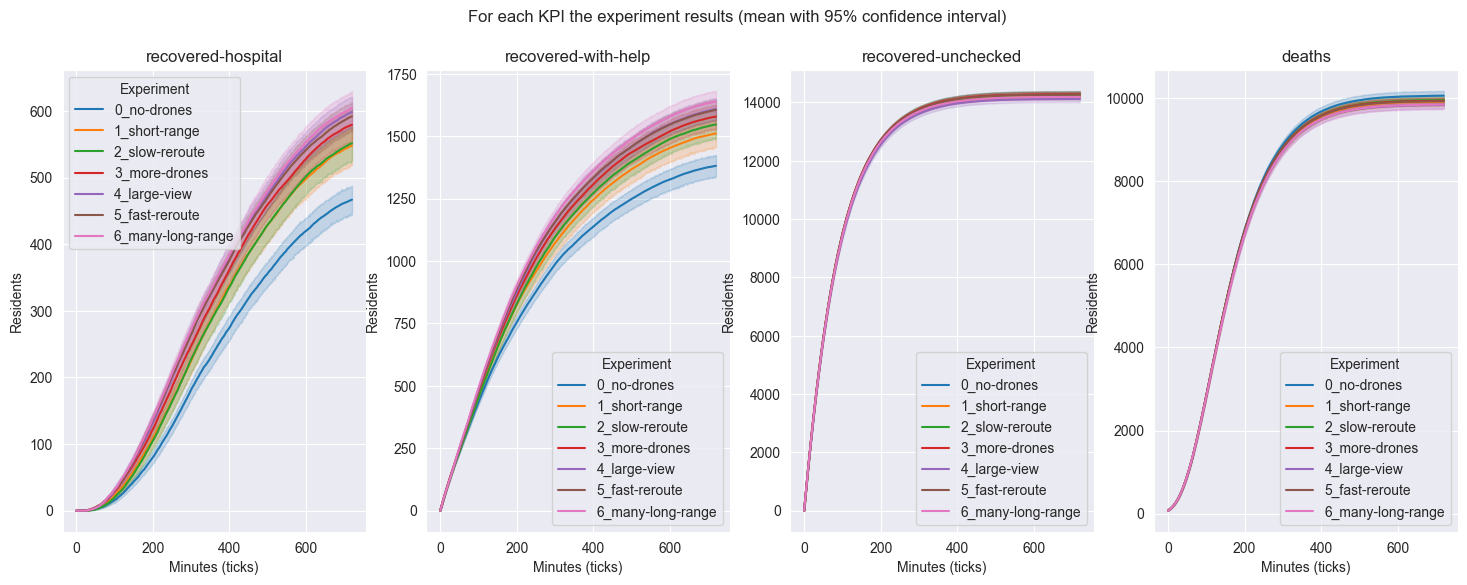

In [8]:
# Plot a lineplot for each KPI with seaborn
# This cell takes a long time, 2 to 3 minutes (probably because of the confidence interval calculation
to_plot = False # Set True to run this complicated plot
if to_plot:
    # Create a figure and axis
    fig, axes = plt.subplots(1,len(KPIs))
    fig.set_size_inches(18,6)

    g = {}
    for i, KPI in enumerate(KPIs):
        # Unstack the dataframe for each KPI, and rename the columns
        df_t = dy_dict[KPI].T.unstack().reset_index()
        df_t.columns = ["Reps", "Ticks", "Experiment", "Data"]

        # Create the lineplot with confidence intervals and save as SVG
        g[KPI] = sns.lineplot(df_t, x="Ticks", y="Data", hue="Experiment", errorbar=("ci", 95), ax=axes[i])
        g[KPI].set_title(f"{KPI}")
        g[KPI].set_ylabel("Residents")
        g[KPI].set_xlabel("Minutes (ticks)")
    fig.suptitle("The experiment results for each KPI (mean with 95% confidence interval)")
    fig.savefig("../images/recovered_lineplots.svg")

### Streets spotted

In [9]:
KPI = "fraction-destroyed-streets-spotted"
df_spotted = pd.DataFrame()

# For each experiment, add a data column to the dataframe of each KPI
for i, exp in enumerate(exp_names):
    df_t = dfs[exp].sort_index(axis="columns", level=0)
    df_spotted[exp] = df_t[KPI].unstack()
df_spotted.head()

0_no-drones 1_short-range 2_slow-reroute 3_more-drones 4_large-view  \
0 0.0         0.0           0.0            0.0           0.0          0.0   
  1.0    0.000405      0.034703       0.040031      0.045673     0.100413   
  2.0    0.001216      0.051057       0.061224      0.076122     0.155785   
  3.0    0.001621      0.070602       0.080455      0.110176     0.205785   
  4.0    0.002027      0.087355       0.107928      0.154647     0.254132   

      5_fast-reroute 6_many-long-range  
0 0.0            0.0               0.0  
  1.0       0.125496          0.147713  
  2.0        0.19857          0.243221  
  3.0       0.250596          0.326184  
  4.0       0.314535          0.421692

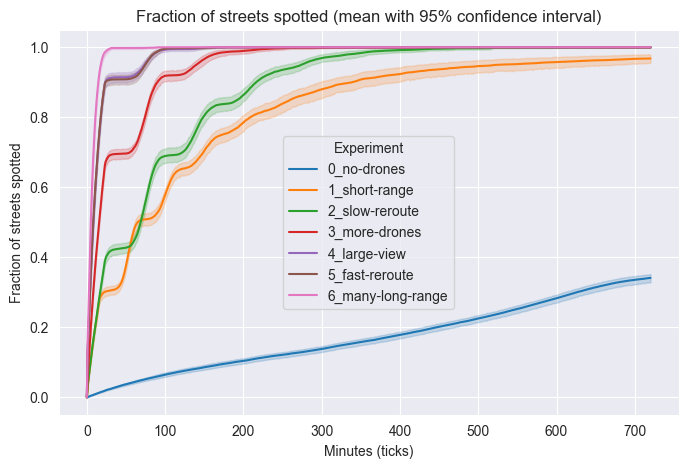

In [10]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(8,5)

df_t = df_spotted.T.unstack().reset_index()
df_t.columns = ["Reps", "Ticks", "Experiment", "Data"]

# Create the lineplot with confidence intervals and save as SVG
gs = sns.lineplot(df_t, x="Ticks", y="Data", hue="Experiment", errorbar=("ci", 95), ax=ax1)

gs.set_title(f"Fraction of streets spotted (mean with 95% confidence interval)")
gs.set_ylabel("Fraction of streets spotted")
gs.set_xlabel("Minutes (ticks)")
fig.savefig("../images/spotted_lineplots.svg")